In [4378]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# get data

In [4379]:
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv',na_values = '?')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

#  clean/fix data

### drop time since first/last std diagnosis columns

In [4381]:
drop_columns = ['STDs: Time since last diagnosis','STDs: Time since first diagnosis','Hinselmann','Schiller']
df['Biopsy'] = df['Biopsy']
df = df.drop(columns = drop_columns)
# df = df.drop('STDs: Time since first diagnosis',axis = 1)
# df = df.drop('STDs: Time since last diagnosis',axis = 1)
print(df['Biopsy'].value_counts())
print(df.to_string())

Biopsy
0    803
1     55
Name: count, dtype: int64
     Age  Number of sexual partners  First sexual intercourse  Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  IUD (years)  STDs  STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Citology  Biopsy
0     18                        4.0                      15.0                 1.0     0.0        0.000000             0.000000                      0.0                         0.000000  0.0         0.00   0.0            0.0                  0.0                           0.0                          0.0                                 0.0            0.0                               0

### impute missing values as mean

In [4382]:
df = df.fillna(df.mean())
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0.0,0,1,0,1,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [4383]:
# split independent variables and dependent variable

vars = df.drop('Biopsy',axis = 1)
result = df['Biopsy']
result.value_counts()

Biopsy
0    803
1     55
Name: count, dtype: int64

# prepare data for training/testing

### split data into training data and testing data

In [4384]:
from sklearn.model_selection import train_test_split

In [4385]:
# vars_train,vars_test,result_train,result_test = train_test_split(vars,result,test_size = 0.2,random_state = 1)

In [4386]:
from imblearn.combine import SMOTETomek
vars_train, vars_test, result_train, result_test = train_test_split(vars, result, shuffle=True, test_size = 0.2,random_state=2)


In [4387]:

# cc = SMOTETomek(random_state=10)
# vars_train, result_train = cc.fit_resample(vars_train, result_train)

In [4388]:
vars_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Citology
568,24,1.0,19.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
793,24,2.0,19.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
174,28,3.0,15.0,5.0,1.0,12.0,12.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
753,20,1.0,18.0,1.0,0.0,0.0,0.0,1.000000,14.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
312,23,2.0,27.0,3.0,0.0,0.0,0.0,0.000000,0.000000,0.112011,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,18,2.0,16.0,1.0,0.0,0.0,0.0,1.000000,0.080000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
584,30,2.0,18.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
493,18,2.0,15.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,1
527,22,2.0,17.0,1.0,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,0.0,0.023904,0.001328,0.002656,0,0,0,0,0,0


In [4389]:
vars_test

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Citology
193,26,10.000000,16.0,1.000000,1.0,9.0,0.513202,0.641333,2.256419,0.112011,...,0.0,0.023904,0.001328,0.002656,0,0,0,0,0,0
328,20,4.000000,15.0,1.000000,0.0,0.0,0.000000,0.641333,2.256419,0.112011,...,0.0,0.023904,0.001328,0.002656,0,0,0,0,0,0
318,23,2.000000,18.0,1.000000,0.0,0.0,0.000000,1.000000,6.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
164,29,2.527644,19.0,2.000000,0.0,0.0,0.000000,0.641333,2.256419,0.112011,...,0.0,0.023904,0.001328,0.002656,0,0,0,0,0,0
832,30,2.000000,18.0,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,20,2.000000,16.0,2.275561,0.0,0.0,0.000000,1.000000,0.750000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
756,25,4.000000,16.0,3.000000,0.0,0.0,0.000000,1.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
471,18,2.000000,16.0,1.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0
116,31,3.000000,17.0,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0


In [4390]:
result_train

568    0
793    0
174    0
753    1
312    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Biopsy, Length: 686, dtype: int64

In [4391]:
result_test

193    0
328    0
318    0
164    0
832    0
      ..
365    0
756    0
471    0
116    0
790    0
Name: Biopsy, Length: 172, dtype: int64

### undersample majority

In [4392]:
import imblearn
from collections import Counter
from numpy import where


In [4393]:
result_train.value_counts()

Biopsy
0    641
1     45
Name: count, dtype: int64

In [4394]:
# undersample = imblearn.under_sampling.CondensedNearestNeighbour()
# vars_train,result_train = undersample.fit_resample(vars_train,result_train)
# result_train.value_counts()

In [4395]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [4396]:

# over = RandomOverSampler(sampling_strategy=.4)
# vars_train,result_train = over.fit_resample(vars_train,result_train)
# result_train.value_counts()

In [4397]:
# under = RandomUnderSampler(sampling_strategy=.3)
# vars_train,result_train = under.fit_resample(vars_train,result_train)
# result_train.value_counts()

### standardize scale of data

In [4398]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [4399]:
# vars_train_scaled = scaler.fit_transform(vars_train)
# vars_test_scaled = scaler.transform(vars_test)

In [4400]:
# vars_train_scaled

In [4401]:
# vars_test_scaled

# train model

In [4402]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=2500, random_state=10).fit(vars_train,result_train)

# train model with xgboost

In [4403]:
import xgboost as xgb

In [4404]:
# xgb_model = xgb.XGBClassifier()
# # fit balanced xgboost on an imbalanced classification dataset
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold


# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# depths = [50,100,500,1000,5000,10000]
# # param_grid = dict(max_depth = depths)
# # grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')
# # grid_result = grid.fit(vars_train, result_train)
# # best_depth = grid_result.best_score_
# # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# estimators = [100,1000,2500,5000]
# # param_grid = dict(n_estimators = estimators)
# # grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')
# # grid_result = grid.fit(vars_train, result_train)
# # best_estimators = grid_result.best_score_
# # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# weights = [1, 10, 25, 50, 75, 99, 100, 1000]
# param_grid = dict(scale_pos_weight=weights,n_estimators = estimators,max_depth = depths)
# grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

# grid_result = grid.fit(vars_train, result_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [4405]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.01,objective = 'binary:logistic',max_depth = 1000,n_estimators = 2500,scale_pos_weight = 15).fit(vars_train,result_train)

In [4406]:
print(str(xgb_model.score(vars_train,result_train)) + " accurate on training data")

1.0 accurate on training data


In [4407]:
print(str(xgb_model.score(vars_test,result_test)) + " accurate on testing data")

0.9418604651162791 accurate on testing data


# evaluate new model

In [4408]:
from sklearn.metrics import classification_report



In [4409]:

xgb_result_predict = xgb_model.predict(vars_test)
print("xgboost")
print(classification_report(result_test,xgb_result_predict))
print("random forest")
randomforest_predict = randomforest.predict(vars_test)
print(classification_report(result_test,randomforest_predict))

xgboost
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.50      0.40      0.44        10

    accuracy                           0.94       172
   macro avg       0.73      0.69      0.71       172
weighted avg       0.94      0.94      0.94       172

random forest
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       162
           1       0.50      0.10      0.17        10

    accuracy                           0.94       172
   macro avg       0.72      0.55      0.57       172
weighted avg       0.92      0.94      0.92       172



In [4410]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from numpy import mean

In [4411]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
# scores = cross_val_score(xgb_model, vars, result, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.5f' % mean(scores))

Text(0.5, 80.7222222222222, 'actual')

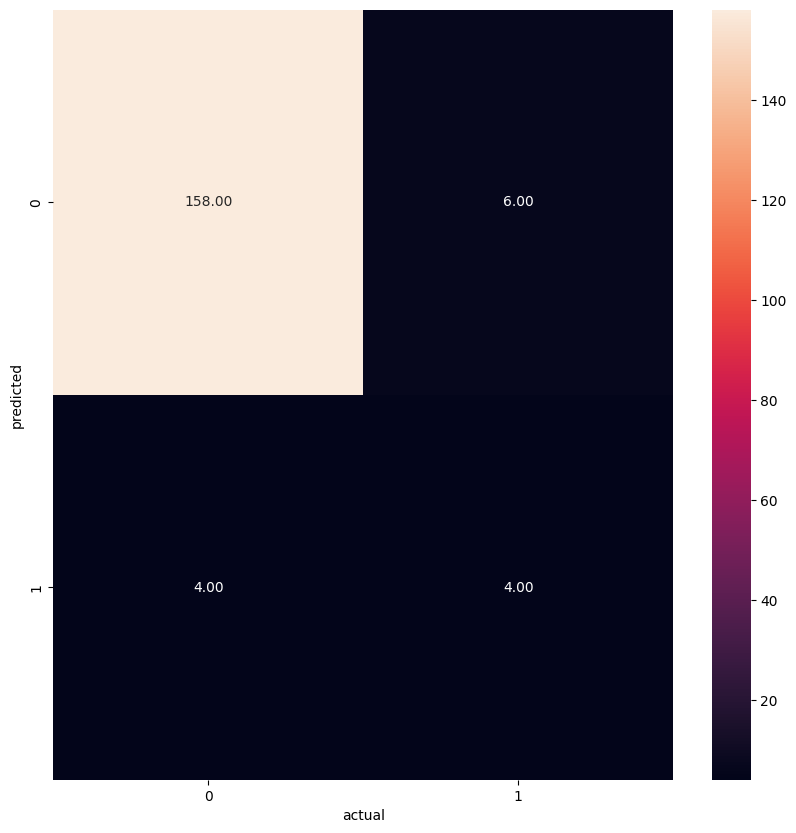

In [4412]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(xgb_result_predict,result_test) 
sns.heatmap(cm,annot = True,fmt = '.2f')
plt.ylabel('predicted')
plt.xlabel('actual')

### save model

In [4413]:
xgb_model.save_model("model.json")

<Axes: >

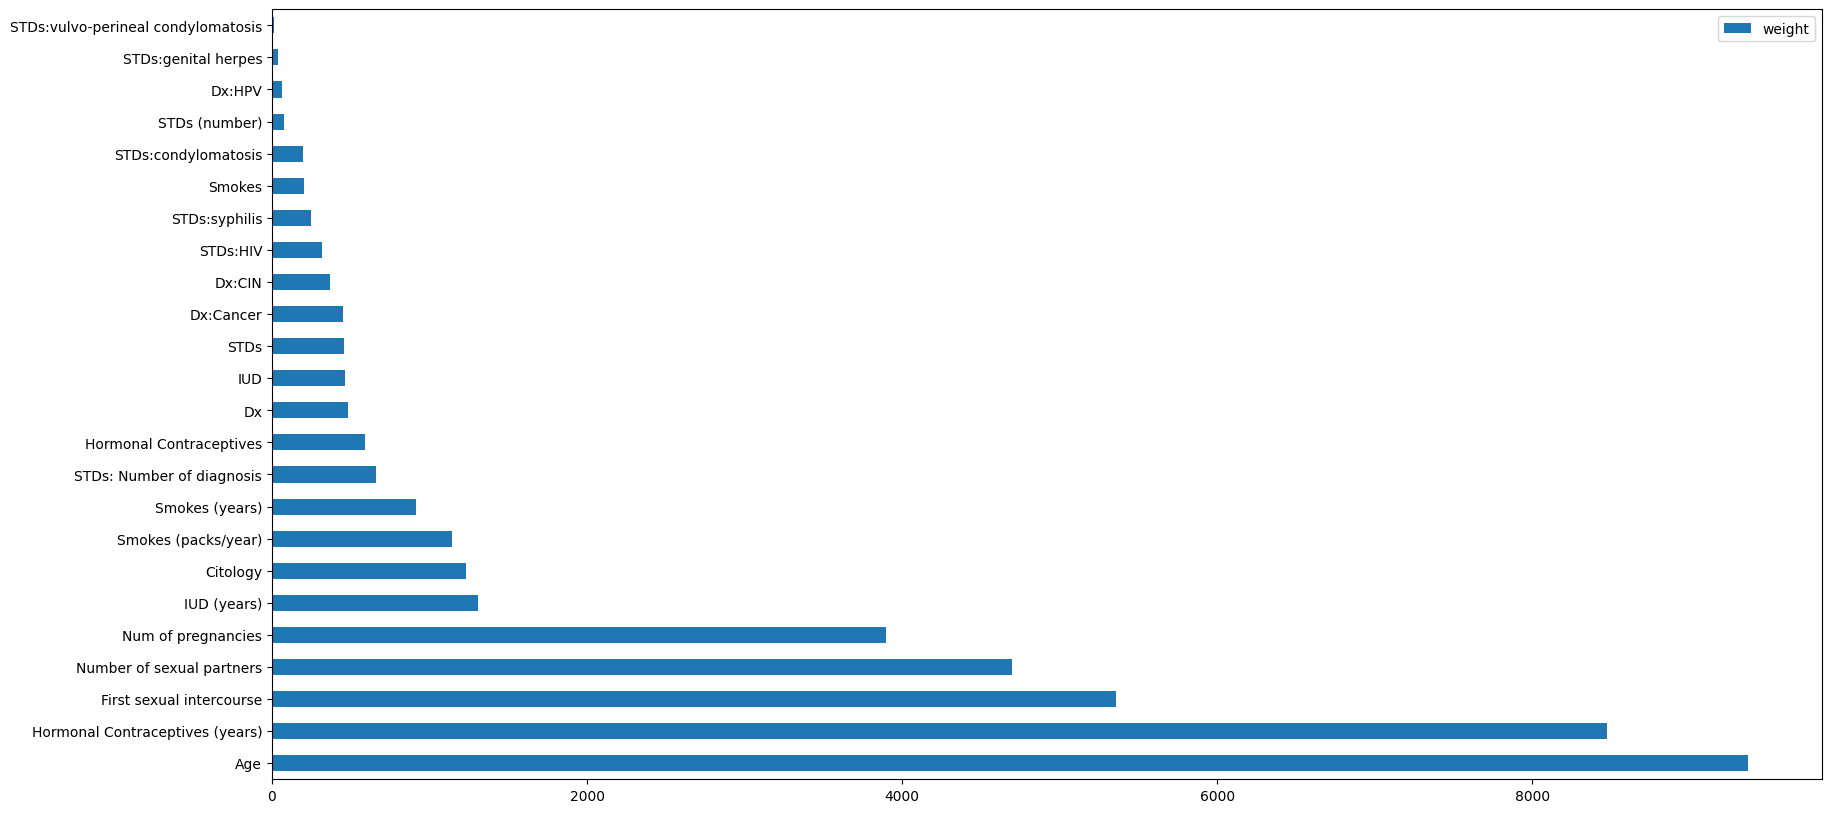

In [4414]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["weight"]).sort_values(by = "weight", ascending=False)
data.nlargest(40, columns="weight").plot(kind='barh', figsize = (20,10)) ## plot top 40 features